#Exploratory Data Analysis Of Haberman Cancer Survival Dataset

It is a dataset that contains data from a study conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
from scipy import stats
sns.set_style('darkgrid')

In [3]:
df=pd.read_csv('haberman.csv')

In [11]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
df.shape

(305, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   30      305 non-null    int64
 1   64      305 non-null    int64
 2   1       305 non-null    int64
 3   1.1     305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [12]:
df.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [13]:
df.columns = ["Age", "Operation_Year", "Axil_Nodes", "Survival_Status"]
df.columns

Index(['Age', 'Operation_Year', 'Axil_Nodes', 'Survival_Status'], dtype='object')

Names of columns are taken from the info about dataset

In [14]:
df.isnull().sum()

Age                0
Operation_Year     0
Axil_Nodes         0
Survival_Status    0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              305 non-null    int64
 1   Operation_Year   305 non-null    int64
 2   Axil_Nodes       305 non-null    int64
 3   Survival_Status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


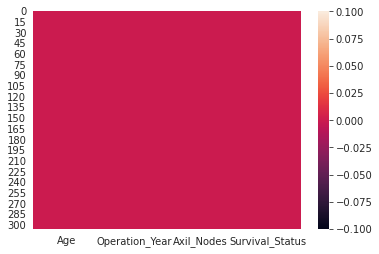

In [15]:
sns.heatmap(df.isnull(),cmap='rocket');

We can see that there are no null values


#EDA

In [16]:
df.describe()

,Age,Operation_Year,Axil_Nodes,Survival_Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


1.**UNIVARIATE ANALYSIS**

mean: 52.5311475409836 
median: 52.0 
skewness: 0.15898611605406873


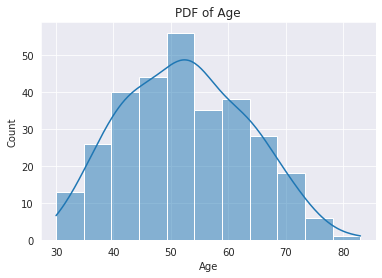

In [18]:
sns.histplot(df['Age'],kde=True);
plt.title('PDF of Age')
print('mean:',df['Age'].mean(),'\nmedian:',df['Age'].median(),'\nskewness:',df['Age'].skew())

We can observe that age is more or less normally distributed.we can infer that from both the distribution plot and mean,median and skewness values.
There are no outliers as such.Lets confirm that with a boxplot

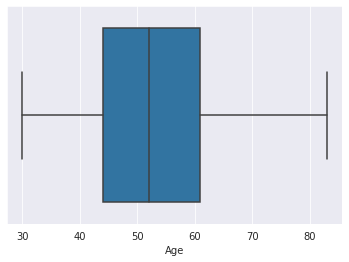

In [19]:
sns.boxplot(x=df['Age']);

In [21]:
df['Operation_Year'].value_counts(normalize=True)*100

58    11.803279
64     9.836066
63     9.836066
65     9.180328
60     9.180328
66     9.180328
59     8.852459
61     8.524590
67     8.196721
62     7.540984
68     4.262295
69     3.606557
Name: Operation_Year, dtype: float64

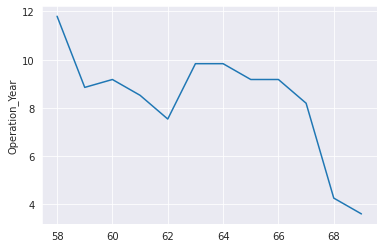

In [22]:
sns.lineplot(x=df['Operation_Year'].value_counts().index,y=df['Operation_Year'].value_counts(normalize=True)*100);

*We can infer that year 1958 had most number of surgeries and there was a sharp decrease in following year and the seesaw of increase and decrease continued till 1964 and thereafter surgeries had only decreased with every passing year*

In [23]:

(df['Axil_Nodes'].value_counts(normalize=True)*100).head()

0    44.590164
1    13.114754
3     6.557377
2     6.557377
4     4.262295
Name: Axil_Nodes, dtype: float64

*We can infer that around 44% of the instances no positive nodes had been detected.That means the cancer is not spreading.we will confirm that later by exploring the relationship between survival and positive lymph node detection*

In [24]:
df['Survival_Status'].value_counts(normalize=True)*100

1    73.442623
2    26.557377
Name: Survival_Status, dtype: float64

**we can clearly state that its an imbalanced  dataset and we will apply SMOTE and undersampling of majority class  to bring the balance**

2.**MULTIVARIATE ANALYSIS**

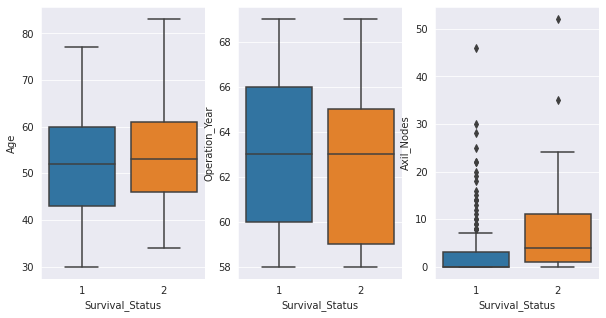

In [33]:
fig, axes = plt.subplots(1, 3,figsize=(10,5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='Survival_Status', y=feature, data=df, ax=axes[idx])
plt.show() 

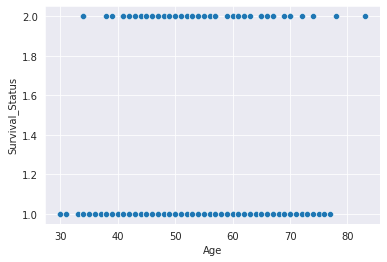

In [25]:
sns.scatterplot(x=df['Age'],y='Survival_Status',data=df);

In [26]:
df.groupby(['Survival_Status','Axil_Nodes'])['Age'].max()

Survival_Status  Axil_Nodes
1                0             76
                 1             75
                 2             71
                 3             77
                 4             59
                 5             52
                 6             62
                 7             59
                 8             70
                 9             63
                 10            34
                 11            38
                 12            47
                 13            35
                 14            70
                 15            37
                 16            44
                 18            55
                 19            54
                 20            42
                 22            64
                 25            60
                 28            63
                 30            34
                 46            54
2                0             72
                 1             78
                 2             83
                 3  

The highest age of the person who survived even after 5 yrs of surgery and has highest number of axil nodes detected(46)(that means even though cancer was spreading) is 54

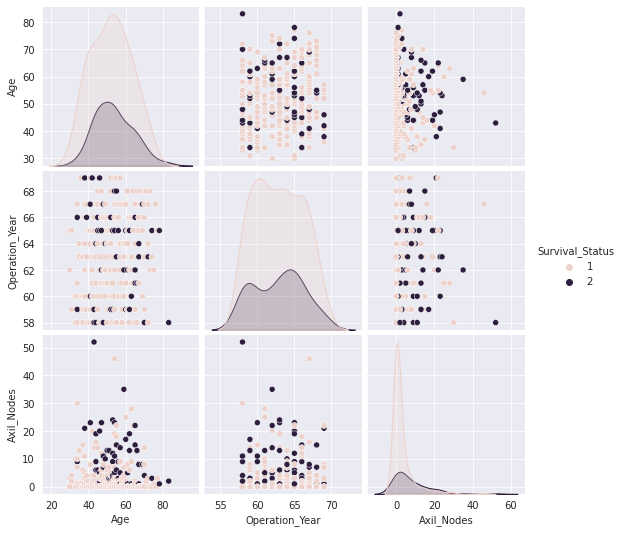

In [29]:
sns.pairplot(df, hue='Survival_Status')
plt.show()

There is no one feature which can clearly separate the survival class from non survival class